In [1]:
cd '/content/drive/My Drive/Colab Notebooks/data_workshop'

/content/drive/My Drive/Colab Notebooks/data_workshop


In [0]:
#ls -lh

In [0]:
#!git add dw_challenge_day4.ipynb

In [0]:
#!git status

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [77]:
df = pd.read_csv('dataset/men_shoes_prices.csv', low_memory=False)
df_usd = df[ df.prices_currency == 'USD' ].copy()
df_usd.shape

(18524, 48)

In [78]:
df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile(df_usd.prices_amountmin, 99)
df_usd_filtered = df_usd[ df_usd.prices_amountmin < filter_max ].copy()
df_usd_filtered.shape

(18280, 48)

In [79]:
mean_price = np.mean( df_usd_filtered['prices_amountmin'] )
mean_price

93.53952188183217

In [80]:
y_true = df_usd_filtered['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)
# Attempt 1

63.968341227870624

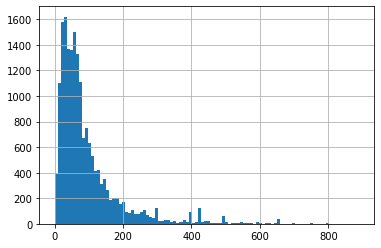

In [81]:
df_usd_filtered['prices_amountmin'].hist(bins=100)

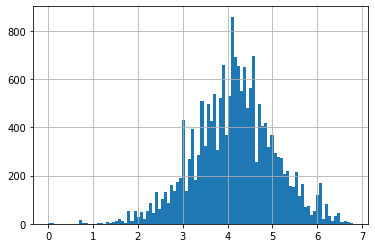

In [82]:
np.log1p(df_usd_filtered['prices_amountmin']).hist(bins=100)

In [83]:
y_true = df_usd_filtered['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)
# Attempt 2

58.01120240700219

In [84]:
print('mediana:')
np.median(y_true)

mediana:


64.95

In [85]:
y_true = df_usd_filtered['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)
# Attempt 3

58.03539547661041

In [86]:
df_usd_filtered.brand.value_counts(normalize=True)
df_usd_filtered.brand.value_counts()

Nike              1709
PUMA               574
Ralph Lauren       524
New Balance        361
VANS               356
                  ... 
Argyle Culture       1
Osiris Shoes         1
Key Apparel          1
Stance               1
DrMartens            1
Name: brand, Length: 1856, dtype: int64

In [0]:
#df_usd_filtered.brand.factorize()
df_usd_filtered['brand_id'] = df_usd_filtered['brand'].factorize()[0] #only indexes

In [0]:
feats = ['brand_id']
X = df_usd_filtered[feats].values
y = df_usd_filtered['prices_amountmin'].values

In [0]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [90]:
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)
# Attempt 4

(-58.38655694633361, 4.223555478221712)

In [0]:
# Function

def run_model(feats):
  X = df_usd_filtered[feats].values
  y = df_usd_filtered['prices_amountmin'].values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [92]:
run_model( ['brand_id'] )

(-58.38655694633361, 4.223555478221712)

In [96]:
# sourceurls
urls = df_usd_filtered['sourceurls']
df_usd_filtered['sourceurls_split'] = urls.str.split('//').str[1].str.split('.').str[1]
df_usd_filtered['sourceurls_split'].value_counts()


walmart            8706
sears              3431
ebay               3254
amazon             1800
ralphlauren         499
sportsauthority     169
nordstrom           107
newegg               64
macys                58
shoes                48
gandermountain       33
overstock            17
kmart                16
sunglassesshop       14
lowes                10
sunglasshut           9
homedepot             7
calvinklein           4
Name: sourceurls_split, dtype: int64

In [0]:
df_usd_filtered['sourceurls_id'] = df_usd_filtered['sourceurls_split'].factorize()[0]

In [100]:
run_model( ['sourceurls_id'] )

(-60.34142553626579, 5.342283481255289)

In [101]:
run_model( ['brand_id', 'sourceurls_id'] )

(-59.310485271662245, 5.145459249078789)

In [0]:
#!git add dw_challenge_day4.ipynb
#!git config --global user.email "me@example.com"
#!git config --global user.name "nervuzz"
#!git commit -am 'Day 4 (late) feature engineering'
#!git push -u origin master